# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
241421,0.0073,0.0024,0.0024,0.0024,0.0024,0.0024,0.0317,0.0781,0.0024,0.0586,0,0,0,0
204916,0.2271,0.0024,0.0366,0.0537,0.0073,0.0317,0.6226,0.8594,0.0049,0.1147,4,4,13,13
286885,0.0171,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0684,0.0024,0.0464,0,0,0,0
81846,0.0073,0.0122,0.1050,0.0024,0.0024,0.0024,0.1221,0.0977,0.0024,0.0073,8,8,10,10
79369,0.0977,0.1904,0.3613,0.0513,0.0024,0.0024,0.3223,0.1538,0.0415,0.0708,5,5,10,10


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.273175,-0.420358,-0.402043,-0.277718,-0.355235,-0.163107,-0.495774,-0.564693,-0.498765,-0.275575
1,-0.304453,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.583680,-0.498765,-0.305083
2,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.589922,-0.498765,-0.334591
3,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.602667,-0.498765,-0.378552
4,-0.335731,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.596424,-0.498765,-0.393607
...,...,...,...,...,...,...,...,...,...,...
378530,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.545445,-0.007433,-0.467075
378531,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.558190,0.012680,-0.467075
378532,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.558190,0.012680,-0.467075
378533,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.564693,0.022532,-0.467075


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [42]:
num_classes = 24
input_dim = X.shape[1]

In [43]:
from keras.models import Sequential    
model = Sequential()   
model.add(Dense(384, input_dim=input_dim, activation='relu'))
model.add(Dense(192, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 384)               4224      
                                                                 
 dense_16 (Dense)            (None, 192)               73920     
                                                                 
 dense_17 (Dense)            (None, 96)                18528     
                                                                 
 dense_18 (Dense)            (None, 48)                4656      
                                                                 
 dense_19 (Dense)            (None, 24)                1176      
                                                                 
Total params: 102,504
Trainable params: 102,504
Non-trainable params: 0
_________________________________________________________________


# 2. Compile Network

In [45]:
model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [47]:
history = model.fit(X_train, y_train, batch_size=10, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
30283/30283 [==============================] - 77s 3ms/step - loss: 1.5531 - accuracy: 0.6031 - val_loss: 1.3902 - val_accuracy: 0.6500
Epoch 2/100
30283/30283 [==============================] - 75s 2ms/step - loss: 1.3185 - accuracy: 0.6665 - val_loss: 1.2750 - val_accuracy: 0.6765
Epoch 3/100
30283/30283 [==============================] - 74s 2ms/step - loss: 1.2365 - accuracy: 0.6850 - val_loss: 1.2151 - val_accuracy: 0.6896
Epoch 4/100
30283/30283 [==============================] - 75s 2ms/step - loss: 1.1868 - accuracy: 0.6959 - val_loss: 1.1735 - val_accuracy: 0.6987
Epoch 5/100
30283/30283 [==============================] - 77s 3ms/step - loss: 1.1513 - accuracy: 0.7032 - val_loss: 1.1429 - val_accuracy: 0.7049
Epoch 6/100
30283/30283 [==============================] - 77s 3ms/step - loss: 1.1235 - accuracy: 0.7093 - val_loss: 1.1180 - val_accuracy: 0.7096
Epoch 7/100
30283/30283 [==============================] - 77s 3ms/step - loss: 1.1008 - accuracy: 0.7140 - val_

30283/30283 [==============================] - 76s 3ms/step - loss: 0.8391 - accuracy: 0.7732 - val_loss: 0.8482 - val_accuracy: 0.7695
Epoch 57/100
30283/30283 [==============================] - 76s 3ms/step - loss: 0.8372 - accuracy: 0.7735 - val_loss: 0.8461 - val_accuracy: 0.7698
Epoch 58/100
30283/30283 [==============================] - 76s 3ms/step - loss: 0.8352 - accuracy: 0.7742 - val_loss: 0.8443 - val_accuracy: 0.7703
Epoch 59/100
30283/30283 [==============================] - 76s 3ms/step - loss: 0.8334 - accuracy: 0.7745 - val_loss: 0.8424 - val_accuracy: 0.7707
Epoch 60/100
30283/30283 [==============================] - 77s 3ms/step - loss: 0.8315 - accuracy: 0.7748 - val_loss: 0.8407 - val_accuracy: 0.7711
Epoch 61/100
30283/30283 [==============================] - 77s 3ms/step - loss: 0.8297 - accuracy: 0.7753 - val_loss: 0.8390 - val_accuracy: 0.7716
Epoch 62/100
30283/30283 [==============================] - 76s 3ms/step - loss: 0.8279 - accuracy: 0.7758 - val_loss: 

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

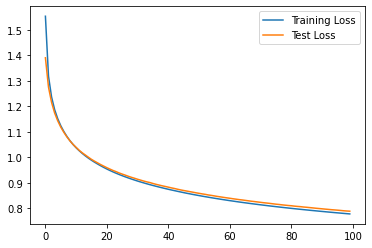

In [48]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

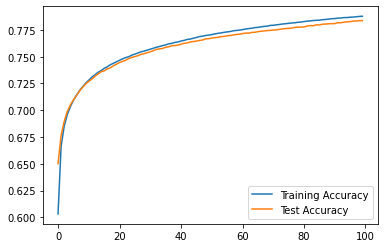

In [49]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [50]:
loss, accuracy = model.evaluate(X_test, y_test)

2366/2366 [==============================] - 4s 2ms/step - loss: 0.7883 - accuracy: 0.7837


##  4.3 Make Predictions

In [51]:
predictions = model.predict(X_test)

In [52]:
predictions

array([[9.8590511e-01, 4.9665774e-04, 1.5223502e-03, ..., 5.9310173e-07,
        1.6682776e-07, 1.7676386e-07],
       [9.9016128e-05, 2.2339627e-06, 1.0063221e-04, ..., 1.0792400e-03,
        1.2904012e-03, 2.9232684e-03],
       [8.0419332e-01, 1.9328043e-02, 1.4138591e-02, ..., 2.9409405e-06,
        4.2153388e-06, 1.1021147e-06],
       ...,
       [5.3084828e-03, 5.5208810e-02, 9.1471091e-02, ..., 2.4056848e-04,
        1.6476253e-04, 1.8460139e-05],
       [9.6331757e-01, 6.4084735e-03, 4.9783173e-03, ..., 1.0316610e-06,
        3.3926904e-07, 1.1877511e-07],
       [1.8303348e-02, 1.6757596e-02, 8.9932606e-02, ..., 1.4434876e-02,
        1.2950501e-03, 7.0697968e-03]], dtype=float32)